In [5]:
#part one: compute the jaccard similarity
#https://github.com/VipanchiKatthula/Jaccard_Cosine_Similarity/blob/master/Jaccard_and_Cosine_Similarity.ipynb
%pip install nltk

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

In [2]:
#load the file
df_hsien = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_hsien.csv')
df_google = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_google.csv')
df_yiyun = pd.read_csv('/Users/wangxuechun/unsw/UNSW-Thesis-/chapter_4_eng_version_yiyun.csv')
df_google = df_google.drop('Unnamed: 0', axis=1)
df_hsien.columns = ['English_Verse']
df_yiyun.columns = ['English_Verse']
df_google.columns = ['English_Verse']
type(df_hsien)

pandas.core.frame.DataFrame

In [3]:
#convert lists of lists:
def lists_of_lists(lists):
    return [item for sublist in lists for item in sublist]

In [4]:
#computation of jaccard similarities
def jaccard_similarities(list1, list2):
    intersections = len(set(list1).intersection(set(list2)))
    unions = len(set(list1).union(set(list2)))
    return (intersections/unions)*100

In [5]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')
nltk.download('stopwords')





[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#data cleaning
def data_cleaning(text):
    tokens = word_tokenize(text)
    #remove the punctuation and convert all to the lower case
    tokens = [token.lower() for token in tokens if token.isalpha()]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in tokens if word not in stop_words]
    return filtered_text


hsien_lists = df_hsien['English_Verse'].apply(data_cleaning)
google_lists = df_google['English_Verse'].apply(data_cleaning)
yiyun_lists = df_yiyun['English_Verse'].apply(data_cleaning)
hsien_list = lists_of_lists(hsien_lists)
google_list = lists_of_lists(google_lists)
yiyun_list = lists_of_lists(yiyun_lists)

0     [said, victors, take, pleasure, victory, unles...
1                     [look, ah, q, light, elated, fly]
2     [victory, without, strange, consequences, thou...
3                            [ah, q, may, die, sonless]
4     [words, sounded, ah, q, cars, thought, quite, ...
5            [monk, paws, woman, woman, woman, thought]
6     [shall, never, know, ah, q, finally, fell, asl...
7                         [see, woman, menace, mankind]
8     [majority, chinese, men, could, become, saints...
9     [ah, q, man, strict, morals, begin, although, ...
10    [could, tell, close, thirty, man, stand, firm,...
11                              [woman, thought, ah, q]
12    [kept, close, watch, women, believed, must, wa...
13    [one, day, ah, q, grinding, rice, chao, house,...
14    [amah, wu, maidservant, chao, household, finis...
15    [mistress, eaten, anything, two, days, master,...
16     [woman, amah, wu, little, widow, thought, ah, q]
17               [young, mistress, going, baby, 

In [8]:
#implementation phase
js_yg = jaccard_similarities(yiyun_list, google_list)
js_hg = jaccard_similarities(hsien_list,google_list)
js_hy = jaccard_similarities(hsien_list, yiyun_list)

print(js_yg, js_hg, js_hy)



18.58974358974359 21.49532710280374 26.126126126126124


In [9]:
#semantic analysis cosine similarity
hsien_list      = ','.join(str(v) for v in hsien_list)
google_list    = ','.join(str(v) for v in google_list)
yiyun_list    = ','.join(str(v) for v in yiyun_list)

In [14]:
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 7.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 6.0 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
#Calculating Cosine Similarity through TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

doc = [hsien_list, yiyun_list, google_list]

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(doc)
words = vectorizer.get_feature_names_out()
similarity_matrix = cosine_similarity(tfidf)

print(similarity_matrix)

[[1.         0.33609327 0.50282451]
 [0.33609327 1.         0.30499986]
 [0.50282451 0.30499986 1.        ]]


In [11]:
#Keybert - extract keyword
%pip install keybert

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
from keybert import KeyBERT
km_model = KeyBERT()

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [14]:
#extract keyword from chapter 4
df_hsien_texts = df_hsien['English_Verse'].tolist()
df_yiyun_texts = df_yiyun['English_Verse'].tolist()
df_google_texts = df_google['English_Verse'].tolist()
keywords = []
for text in df_hsien_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords.append(extracted_keywords)
print(keywords)


[[('victory', 0.3793), ('victors', 0.3656), ('surrendered', 0.351), ('triumph', 0.3256), ('rival', 0.3121)], [('fly', 0.4497), ('light', 0.4108), ('elated', 0.2952), ('look', 0.2642), ('ah', 0.1349)], [('nun', 0.4271), ('snored', 0.4183), ('flew', 0.3269), ('finger', 0.2598), ('victory', 0.256)], [('sonless', 0.5798), ('die', 0.2846), ('ah', 0.0955)], [('sonless', 0.2803), ('teachings', 0.2527), ('wife', 0.2264), ('ought', 0.211), ('descendants', 0.206)], [('monk', 0.3812), ('woman', 0.3592), ('paws', 0.3521), ('thought', 0.1073)], [('fingers', 0.2895), ('asleep', 0.2687), ('soft', 0.2443), ('thinking', 0.1925), ('evening', 0.1869)], [('woman', 0.5084), ('menace', 0.4291), ('mankind', 0.3863)], [('shang', 0.4679), ('chinese', 0.3642), ('chan', 0.341), ('cho', 0.3034), ('chin', 0.2992)], [('nuns', 0.4837), ('monks', 0.4243), ('heretics', 0.4008), ('nun', 0.3944), ('morals', 0.3576)], [('nun', 0.5241), ('odiousness', 0.3115), ('headedness', 0.2718), ('woman', 0.2481), ('hateful', 0.2231)

In [12]:
keywords_google = []
for text in df_google_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords_google.append(extracted_keywords)
print(keywords_google)


[[('victory', 0.4794), ('proud', 0.4192), ('winners', 0.3988), ('crowned', 0.395), ('overcome', 0.3263)], [('flying', 0.5399), ('seeing', 0.3646)], [('finger', 0.4655), ('fingers', 0.454), ('thumb', 0.4208), ('slippery', 0.3892), ('snore', 0.3022)], [('grandson', 0.4907), ('broken', 0.3516), ('son', 0.3399)], [('piety', 0.265), ('thoughts', 0.2628), ('sentence', 0.2609), ('filial', 0.2461), ('ghost', 0.2451)], [('women', 0.4972), ('thought', 0.2537)], [('monk', 0.4618), ('woman', 0.302), ('women', 0.2894), ('moves', 0.2582), ('thought', 0.1071)], [('snoring', 0.4943), ('female', 0.2953), ('slippery', 0.2796), ('fingers', 0.2515), ('fluttered', 0.2459)], [('harmful', 0.4741), ('women', 0.3903), ('know', 0.2221)], [('zhou', 0.4953), ('shang', 0.4864), ('zhuo', 0.451), ('qin', 0.4264), ('chinese', 0.3541)], [('fanny', 0.3132), ('doctrine', 0.2472), ('monk', 0.2443), ('righteousness', 0.2433), ('nun', 0.2407)], [('nun', 0.503), ('nuns', 0.4482), ('heresy', 0.3106), ('fluttering', 0.3061), 

In [13]:
keywords_yiyun = []
for text in df_yiyun_texts:
    extracted_keywords = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english')
    keywords_yiyun.append(extracted_keywords)
print(keywords_yiyun)


[[('victory', 0.4304), ('overcoming', 0.3769), ('conquest', 0.3725), ('superiority', 0.3711), ('slain', 0.3658)], [('snoring', 0.4942), ('nun', 0.4415), ('forefinger', 0.3588), ('thumb', 0.297), ('lain', 0.2796)], [('descendants', 0.4364), ('scripture', 0.4183), ('ancient', 0.3109), ('grave', 0.2777), ('dying', 0.2596)], [('woman', 0.4018), ('thought', 0.204)], [('goose', 0.5018), ('sauce', 0.3668), ('woman', 0.2876), ('thought', 0.1582)], [('snoring', 0.5754), ('asleep', 0.275), ('evening', 0.1403), ('fingertips', 0.1308), ('fell', 0.11)], [('women', 0.4279), ('evil', 0.4067), ('proof', 0.3494), ('irrefutable', 0.3482), ('root', 0.2002)], [('shang', 0.4352), ('zhou', 0.4243), ('zhuo', 0.363), ('qin', 0.3449), ('concubine', 0.3319)], [('nuns', 0.3534), ('heretics', 0.338), ('monks', 0.3303), ('nun', 0.3022), ('ordained', 0.2503)], [('confucius', 0.4579), ('nun', 0.452), ('confucian', 0.3608), ('veiled', 0.3391), ('bewitchingly', 0.3144)], [('woman', 0.5064), ('thinking', 0.38), ('ah', 

In [19]:
#bigrams tri-grams

df_ngrams_yiyun = pd.DataFrame(df_yiyun)

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string
import re

# Download the necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Add additional punctuation to the default set
additional_punctuations = '‘’“”…'
all_punctuations = string.punctuation + additional_punctuations

# Function to clean text data
def clean_text(text):
    text = re.sub(f'[{re.escape(all_punctuations)}]', '', text)
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and not token.isdigit()]
    return tokens

# Assuming df_ngrams_yiyun is your DataFrame and 'English_Verse' is the column with text
# Clean the text and remove stop words
df_ngrams_yiyun['tokens'] = df_ngrams_yiyun['English_Verse'].apply(clean_text)

# Generate bigrams and trigrams without stop words and punctuation
df_ngrams_yiyun['bigrams'] = df_ngrams_yiyun['tokens'].apply(lambda x: list(ngrams(x, 2)) if len(x) > 1 else [])
df_ngrams_yiyun['trigrams'] = df_ngrams_yiyun['tokens'].apply(lambda x: list(ngrams(x, 3)) if len(x) > 2 else [])


df_ngrams_yiyun['bigrams']

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


pandas.core.series.Series

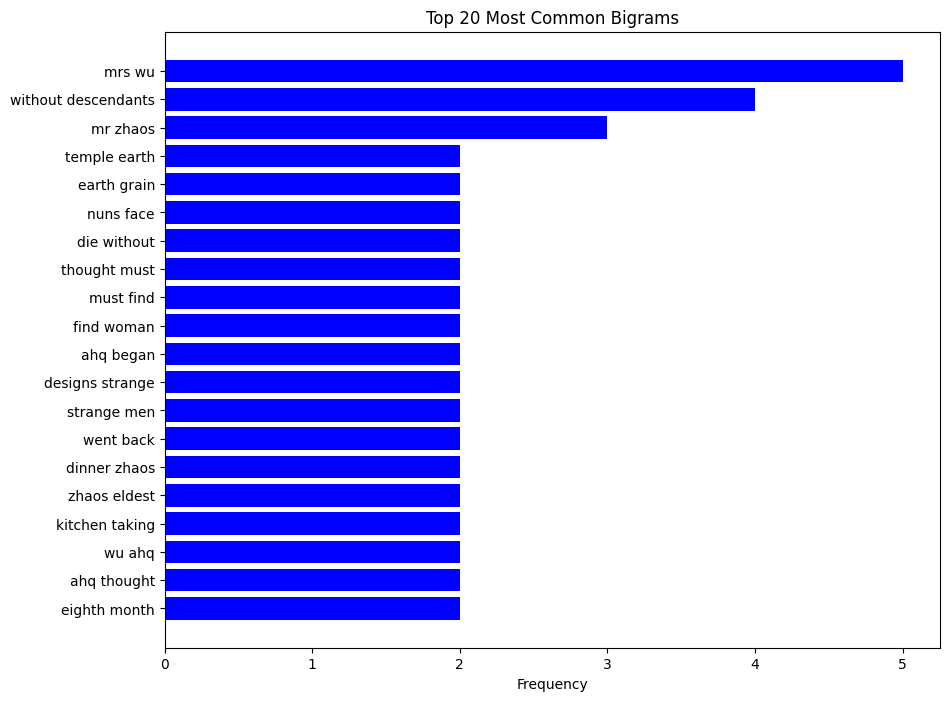

In [23]:
import matplotlib.pyplot as plt
from collections import Counter
import itertools

# Flatten all bigrams from the DataFrame into a single list
all_bigrams = list(itertools.chain.from_iterable(df_ngrams_yiyun['bigrams']))

# Count the frequencies of bigrams
bigram_freq = Counter(all_bigrams)

# Get the top 20 most common bigrams
top_bigrams = bigram_freq.most_common(20)

# Prepare data for plotting
bigram_labels, bigram_counts = zip(*top_bigrams)

# Convert bigram tuples into strings for better visualization
bigram_labels = [' '.join(bigram) for bigram in bigram_labels]

plt.figure(figsize=(10, 8))
plt.barh(bigram_labels, bigram_counts, color='blue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Bigrams')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()





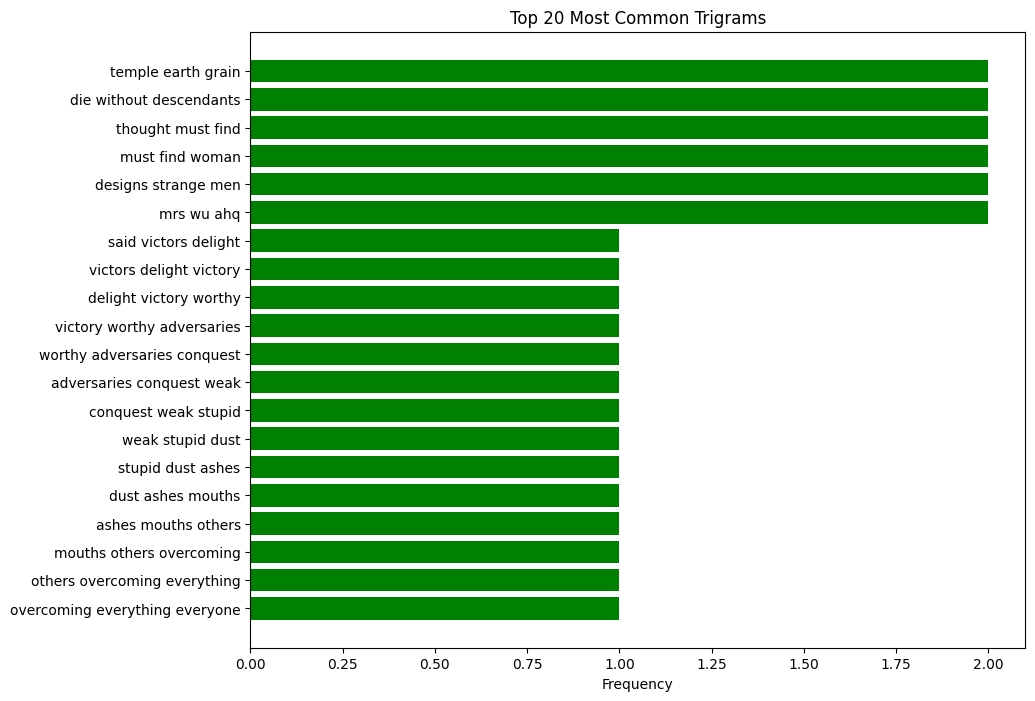

In [22]:
# Flatten all trigrams from the DataFrame into a single list
all_trigrams = list(itertools.chain.from_iterable(df_ngrams_yiyun['trigrams']))

# Count the frequencies of trigrams
trigram_freq = Counter(all_trigrams)

# Get the top 20 most common trigrams
top_trigrams = trigram_freq.most_common(20)

# Prepare data for plotting
trigram_labels, trigram_counts = zip(*top_trigrams)

# Convert trigram tuples into strings for better visualization
trigram_labels = [' '.join(trigram) for trigram in trigram_labels]

# Create the horizontal bar plot for trigrams
plt.figure(figsize=(10, 8))
plt.barh(trigram_labels, trigram_counts, color='green')
plt.xlabel('Frequency')
plt.title('Top 20 Most Common Trigrams')
plt.gca().invert_yaxis()  
plt.show()
